___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option("display.max_columns", None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [33]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [35]:
x_train[2].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [36]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

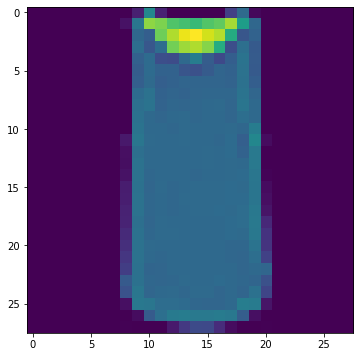

In [37]:
plt.imshow(x_train[2])
plt.show()

C:\Users\saraa\AppData\Local\Temp\ipykernel_14260\2196119652.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))


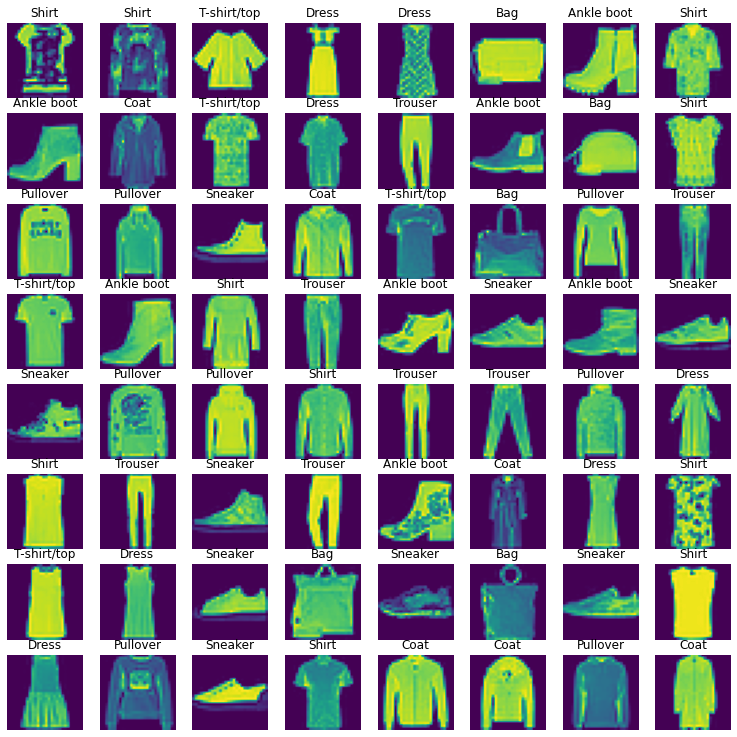

In [38]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [39]:
x_train[2].min()

0

In [40]:
x_train[2].max()

255

In [41]:
# Normalize image

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [42]:
x_train[2].min()

0.0

In [43]:
x_train[2].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [44]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [45]:
np.expand_dims(x_train, 3).shape

(60000, 28, 28, 1)

In [46]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

In [47]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [50]:
y_train[2]

0

In [51]:
Y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [53]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2), strides= (1,1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

In [57]:
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 118s 62ms/step - loss: 0.3830 - accuracy: 0.8648 - val_loss: 0.3497 - val_accuracy: 0.8758
Epoch 2/20
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2557 - accuracy: 0.9082 - val_loss: 0.2824 - val_accuracy: 0.8976
Epoch 3/20
1875/1875 [==============================] - 111s 59ms/step - loss: 0.2141 - accuracy: 0.9224 - val_loss: 0.2656 - val_accuracy: 0.9045
Epoch 4/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1834 - accuracy: 0.9334 - val_loss: 0.2714 - val_accuracy: 0.9057
Epoch 5/20
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1599 - accuracy: 0.9422 - val_loss: 0.2643 - val_accuracy: 0.9077
Epoch 6/20
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1404 - accuracy: 0.9500 - val_loss: 0.2898 - val_accuracy: 0.9071
Epoch 7/20
1875/1875 [==============================] - 123s 66ms/step - loss: 0.1237 - accuracy: 0.9555 - val_loss: 0

**TASK 7: Plot values of metrics you used in your model.**

In [58]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.383047,0.864750,0.349671,0.8758
1,0.255672,0.908167,0.282368,0.8976
2,0.214093,0.922400,0.265635,0.9045
3,0.183385,0.933367,0.271369,0.9057
4,0.159854,0.942167,0.264283,0.9077


<AxesSubplot:>

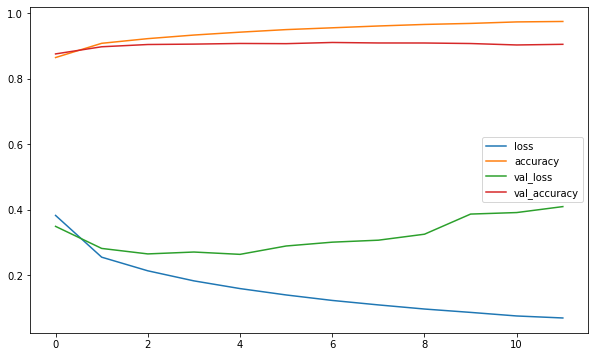

In [59]:
summary.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [60]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [61]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3015 - accuracy: 0.9107


[0.30147022008895874, 0.9107000231742859]

In [62]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.30147022008895874
Test accuracy: 0.9107000231742859


In [63]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 3s 10ms/step


array([[3.4282484e-09, 1.7031436e-13, 8.3550896e-07, ..., 1.3768662e-06,
        1.6269998e-09, 9.9999642e-01],
       [3.7143000e-09, 4.1167249e-23, 1.0000000e+00, ..., 2.8094828e-16,
        4.7034548e-16, 1.9367804e-13],
       [4.0445047e-09, 1.0000000e+00, 3.4989180e-13, ..., 2.3206226e-14,
        2.9420604e-13, 2.5603000e-15],
       ...,
       [4.9051132e-12, 1.0720991e-14, 9.2685486e-12, ..., 1.0211111e-11,
        9.9999988e-01, 3.8288542e-11],
       [1.1237805e-09, 1.0000000e+00, 1.6183340e-12, ..., 2.1424063e-13,
        2.0267419e-13, 6.0238832e-12],
       [7.7278462e-05, 2.5440472e-06, 1.0490349e-03, ..., 9.3331402e-03,
        2.8403403e-04, 3.3548474e-03]], dtype=float32)

In [64]:
pred_prob[2]

array([4.0445047e-09, 1.0000000e+00, 3.4989180e-13, 1.8372114e-09,
       1.0182283e-12, 2.2113266e-11, 6.8333311e-11, 2.3206226e-14,
       2.9420604e-13, 2.5603000e-15], dtype=float32)

In [65]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.89      0.86      1000
           3       0.89      0.93      0.91      1000
           4       0.92      0.77      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.81      0.77      1000
           7       0.98      0.95      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [69]:
print(confusion_matrix(y_test, y_pred))

[[844   1  16  15   3   1 116   0   4   0]
 [  0 976   1  14   3   0   4   0   2   0]
 [  9   1 889   8  23   0  70   0   0   0]
 [  5   4  12 928  14   1  36   0   0   0]
 [  0   1 109  40 769   0  80   0   1   0]
 [  0   0   0   0   0 983   0   5   0  12]
 [ 79   1  45  29  27   0 813   0   6   0]
 [  0   0   0   0   0  10   0 952   0  38]
 [  2   0   2   7   1   2   6   1 978   1]
 [  1   0   0   0   0   6   0  18   0 975]]


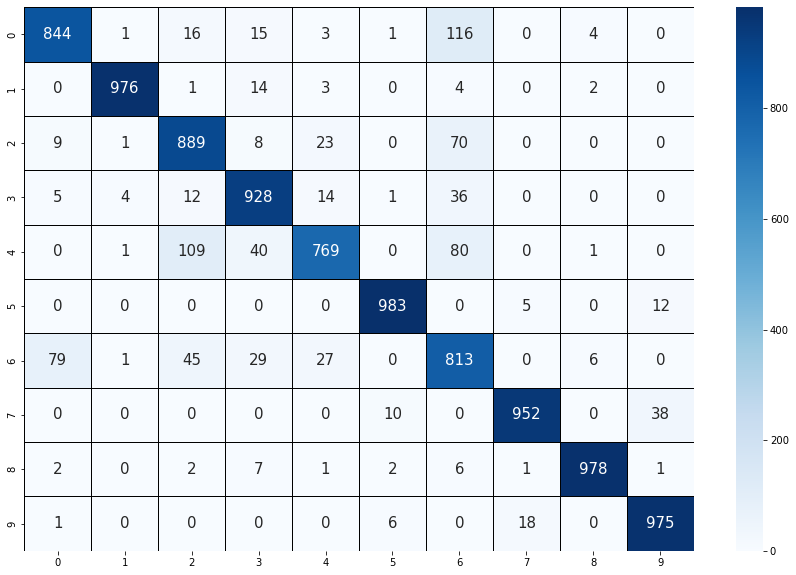

In [70]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [71]:
np.not_equal(y_test, y_pred).sum()

893

In [72]:
np.equal(y_test, y_pred).sum()

9107

## Prediction

In [73]:
pred_number = x_test[2]

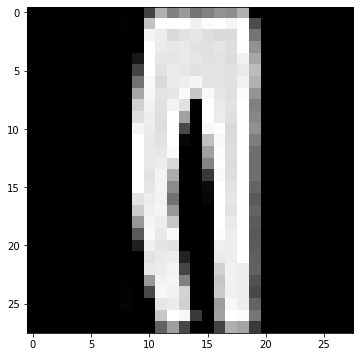

In [76]:
plt.imshow(pred_number, cmap="gray")
plt.show()

In [84]:
np.expand_dims(pred_number, 0).shape

(1, 28, 28, 1)

In [85]:
pred_prob = model.predict(np.expand_dims(pred_number, 0))
pred_prob

1/1 [==============================] - 0s 28ms/step


array([[4.0445127e-09, 1.0000000e+00, 3.4989115e-13, 1.8372114e-09,
        1.0182224e-12, 2.2113349e-11, 6.8333311e-11, 2.3206270e-14,
        2.9420607e-13, 2.5603002e-15]], dtype=float32)

In [86]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [87]:
model.save("fashion-mnist.h5")

C:\Users\saraa\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [89]:
import tensorflow as tf

In [90]:
model = tf.keras.models.load_model("fashion-mnist.h5")

In [91]:
pred = model.predict(np.expand_dims(x_test[2], 0))

1/1 [==============================] - 0s 69ms/step


In [92]:
np.argmax(pred)

1

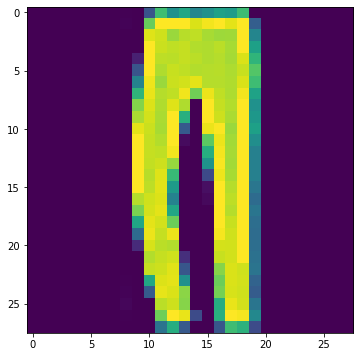

In [93]:
plt.imshow(x_test[2].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___